# Ethnicity Model

This note we'll build a CNN to classify the ethnicity problem. To build our CNN we'll use [tensorflow](https://www.tensorflow.org/)

## Setup

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils.helpers import unwrapper_data
from sklearn.model_selection import train_test_split
from glob import glob
%matplotlib inline

## Data

In [2]:
DATA_PATH = 'data/'
data = glob(DATA_PATH+'*.ethnicity.pkl')
print(data)

['data/05.ethnicity.pkl', 'data/01.ethnicity.pkl', 'data/02.ethnicity.pkl', 'data/03.ethnicity.pkl', 'data/04.ethnicity.pkl']


## Model

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', input_shape=(100,100,3)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 128)       0         
__________

## Input

In [4]:
X, y = unwrapper_data(data)
mean_x = np.mean(X)
for i, _ in enumerate(X):
    X[i] -= mean_x
print(mean_x)

0.48104745


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_oh_train = tf.keras.utils.to_categorical(y=y_train, num_classes=5).astype(np.uint8)
y_oh_test =  tf.keras.utils.to_categorical(y=y_test, num_classes=5).astype(np.uint8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20149, 100, 100, 3), (3556, 100, 100, 3), (20149,), (3556,))

## Training

In [7]:
BATCH_SIZE = 64
EPOCHS = 100

In [8]:
list_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                  tf.keras.callbacks.ModelCheckpoint('models/best_model_ethnicity.hdf5', monitor='val_loss', verbose=1, save_best_only=True)]
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

hist = model.fit(x=X_train, y=y_oh_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=list_callbacks, validation_split=0.15)

Train on 17126 samples, validate on 3023 samples
Epoch 1/100
17088/17126 [============================>.] - ETA: 0s - loss: 1.6627 - acc: 0.4295
Epoch 00001: val_loss improved from inf to 1.46678, saving model to models/best_model_ethnicity.hdf5
17126/17126 [==============================] - 274s 16ms/step - loss: 1.6621 - acc: 0.4297 - val_loss: 1.4668 - val_acc: 0.4059
Epoch 2/100
17088/17126 [============================>.] - ETA: 0s - loss: 1.3892 - acc: 0.4704
Epoch 00002: val_loss improved from 1.46678 to 1.30014, saving model to models/best_model_ethnicity.hdf5
17126/17126 [==============================] - 294s 17ms/step - loss: 1.3892 - acc: 0.4703 - val_loss: 1.3001 - val_acc: 0.5104
Epoch 3/100
17088/17126 [============================>.] - ETA: 0s - loss: 1.3482 - acc: 0.4965
Epoch 00003: val_loss improved from 1.30014 to 1.29966, saving model to models/best_model_ethnicity.hdf5
17126/17126 [==============================] - 291s 17ms/step - loss: 1.3480 - acc: 0.4966 - val

17088/17126 [============================>.] - ETA: 0s - loss: 1.0576 - acc: 0.6214
Epoch 00028: val_loss did not improve from 1.05141
17126/17126 [==============================] - 210s 12ms/step - loss: 1.0578 - acc: 0.6212 - val_loss: 1.0732 - val_acc: 0.5888
Epoch 29/100
17088/17126 [============================>.] - ETA: 0s - loss: 1.0514 - acc: 0.6252
Epoch 00029: val_loss did not improve from 1.05141
17126/17126 [==============================] - 286s 17ms/step - loss: 1.0517 - acc: 0.6249 - val_loss: 1.1294 - val_acc: 0.5223
Epoch 30/100
17088/17126 [============================>.] - ETA: 0s - loss: 1.0584 - acc: 0.6213
Epoch 00030: val_loss did not improve from 1.05141
17126/17126 [==============================] - 292s 17ms/step - loss: 1.0582 - acc: 0.6213 - val_loss: 1.0640 - val_acc: 0.5997
Epoch 31/100
17088/17126 [============================>.] - ETA: 0s - loss: 1.0572 - acc: 0.6205
Epoch 00031: val_loss did not improve from 1.05141
17126/17126 [========================

In [9]:
print('Train =>', model.evaluate(X_train, y_oh_train, verbose=0))
print('Test =>', model.evaluate(X_test, y_oh_test, verbose=0))

Train => [0.9270473879154778, 0.6514467219483072]
Test => [1.0852136095677773, 0.5975815523059618]


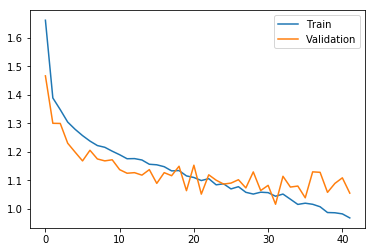

In [10]:
hist_dict = hist.history
loss_val = hist_dict['val_loss']
loss_train = hist_dict['loss']

plt.figure()
plt.plot(loss_train, label='Train')
plt.plot(loss_val, label='Validation')
plt.legend()

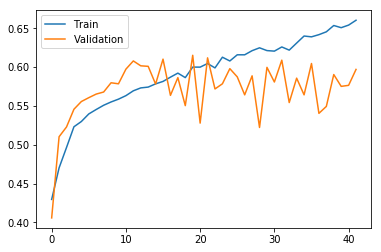

In [11]:
hist_dict = hist.history
acc_val = hist_dict['val_acc']
acc_train = hist_dict['acc']

plt.figure()
plt.plot(acc_train, label='Train')
plt.plot(acc_val, label='Validation')
plt.legend()